## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [8]:
df.head()
df.tail()

,m,TagName,Unnamed: 2
2127,2021-05-01 00:00:00,javascript,19235
2128,2021-05-01 00:00:00,perl,128
2129,2021-05-01 00:00:00,r,5509
2130,2021-05-01 00:00:00,ruby,454
2131,2021-05-01 00:00:00,php,5491


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [9]:
df.shape

(2132, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [10]:
df.columns
df[["m", "TagName", "Unnamed: 2"]].count()

m             2132
TagName       2132
Unnamed: 2    2132
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [11]:
no_m_df = df.drop(columns=["m"])
sum_df = no_m_df.groupby("TagName").sum()
sum_df.idxmax()

Unnamed: 2    javascript
dtype: object

In [12]:
sum_df

,Unnamed: 2
TagName,
assembly,37876
c,359048
c#,1480000
c++,725642
delphi,48088
go,53832
java,1776383
javascript,2220848
perl,65489


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [13]:
df.groupby("TagName").count().idxmin()

m             go
Unnamed: 2    go
dtype: object

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [5]:
df["m"] = pd.to_datetime(df["m"], format="%Y-%m-%d %H:%M:%S")

In [15]:
df.head()


,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [16]:
print(df.dtypes)

m             datetime64[ns]
TagName               object
Unnamed: 2             int64
dtype: object


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [17]:
df.shape

(2132, 3)

In [18]:
df.columns


Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [19]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [20]:
df.groupby("TagName").count()

,m,Unnamed: 2
TagName,,
assembly,154,154
c,154,154
c#,155,155
c++,154,154
delphi,154,154
go,139,139
java,154,154
javascript,154,154
perl,154,154


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [6]:
import matplotlib.pyplot as plt

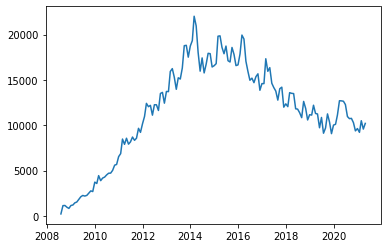

In [7]:
df_java = df[df['TagName'] == 'java']
plt.plot(df_java['m'], df_java['Unnamed: 2'])

In [8]:
df_java = df_java.rename(columns={'Unnamed: 2': 'posts'})

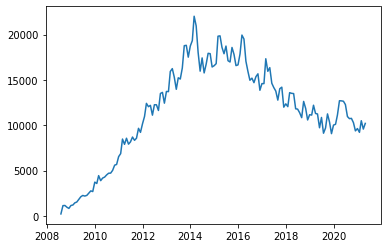

In [9]:
plt.plot('m', 'posts', data=df_java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

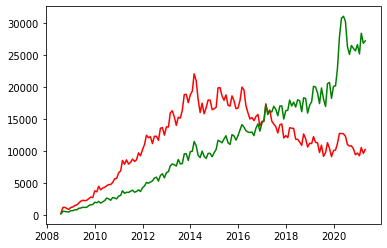

In [10]:
df = df.rename(columns={"Unnamed: 2": "posts"})
df_python = df[df["TagName"] == "python"]
plt.plot(df_java["m"], df_java["posts"], "-r", df_python["m"], df_python["posts"], "-g")

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [1]:
# # import sys
# # sys.path.append("/Users/Kenny/anaconda2/envs/py_meng/lib/python3.8/site-packages")
# import numpy
# import scipy

# df_java.posts.rolling(6, win_type="triang").mean()

ModuleNotFoundError: No module named 'scipy'

In [11]:
reshaped_df = df.pivot(index="m", columns="TagName", values="posts")

In [13]:
reshaped_df.shape


(155, 14)

In [14]:
reshaped_df.columns


Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [17]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,754.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,503.0,452.0,1.0,159.0,0.0


In [16]:
reshaped_df.fillna(0, inplace=True) 


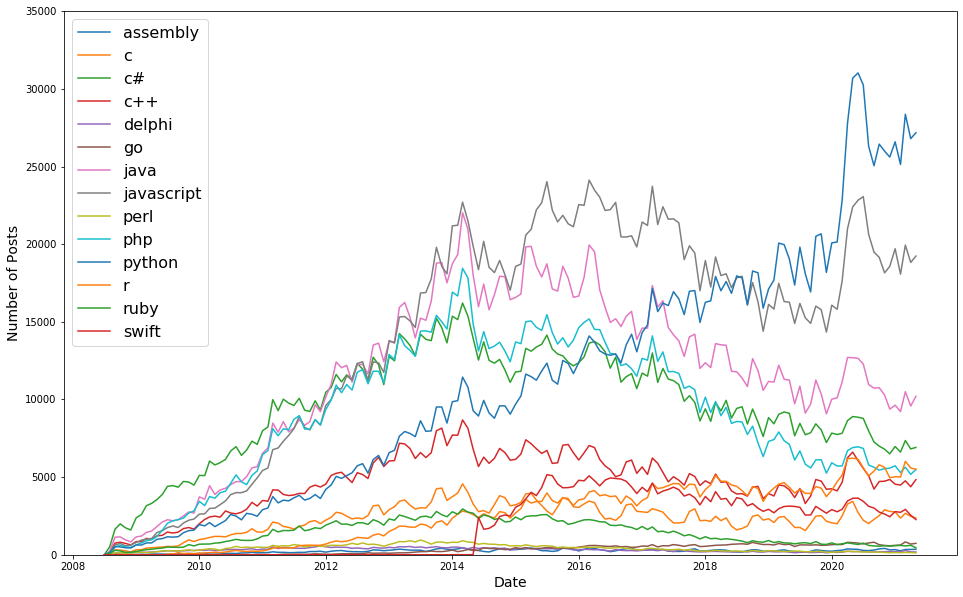

In [29]:
plt.figure(figsize=(16, 10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshaped_df.index, reshaped_df.java, "-b", reshaped_df.index, reshaped_df.python, "-r")
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
plt.legend(fontsize=16)

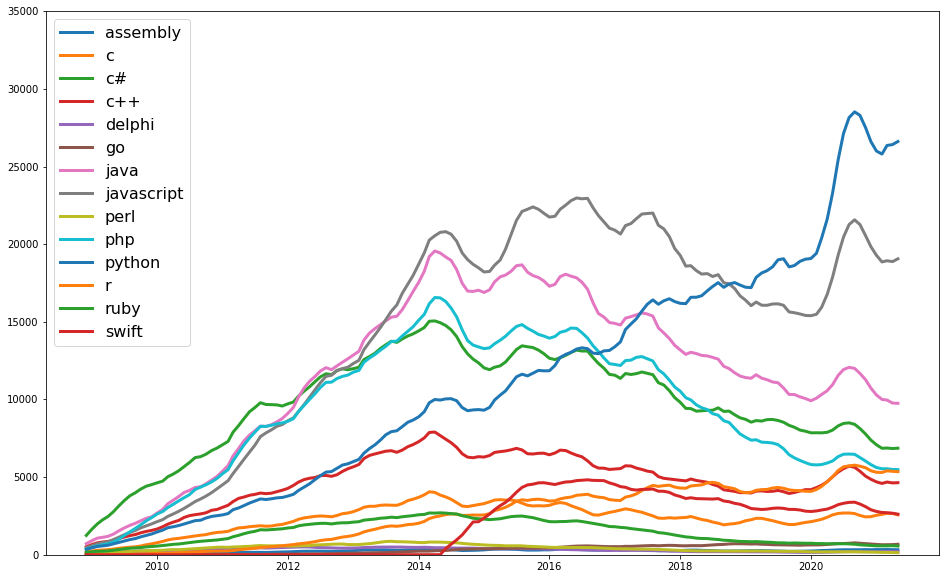

In [32]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16, 10))
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)


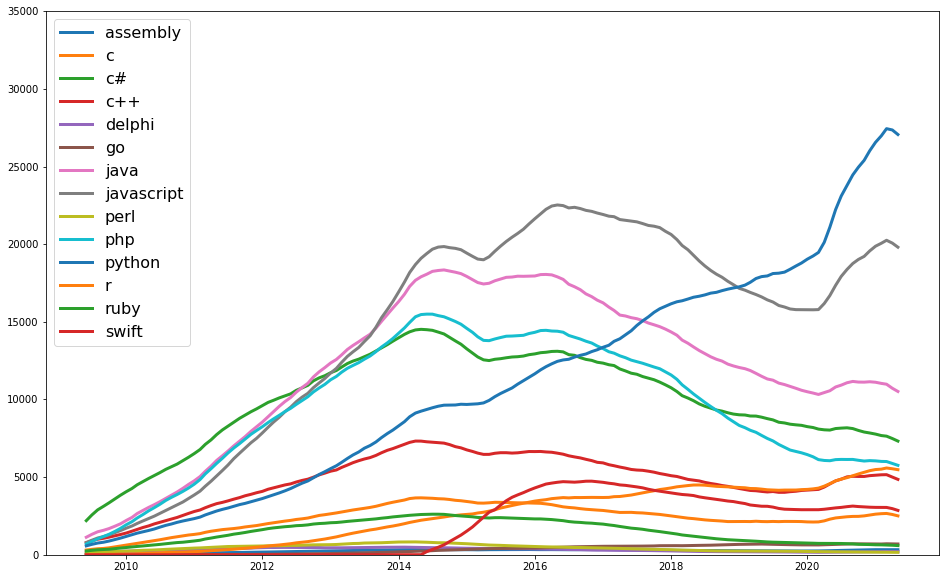

In [34]:
roll_df = reshaped_df.rolling(window=12).mean()
plt.figure(figsize=(16, 10))
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)
